In [3]:
import sys
import matplotlib.pyplot as plt
import numpy as np

!pip install -U scikit-learn
import sklearn
import sklearn.datasets as datasets
%matplotlib inline 

!pip install pandas
import pandas

import warnings
warnings.filterwarnings('ignore')

print('Python: {}'.format(sys.version))
print('Scikit-learn: {}'.format(sklearn.__version__))
print('NumPy: {}'.format(np.__version__))

np.random.seed(42)


Python: 3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
Scikit-learn: 1.4.1.post1
NumPy: 1.26.4


# Short simulation

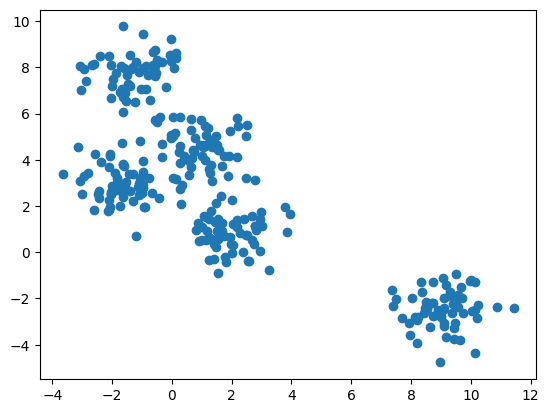

In [6]:
# Generate random data
X, Y = datasets.make_blobs(centers=5, cluster_std=0.8, random_state=0, n_samples=300)

# Observe the data that you will manipulate
plt.jet() 
plt.scatter(X[:,0], X[:,1])
plt.show()

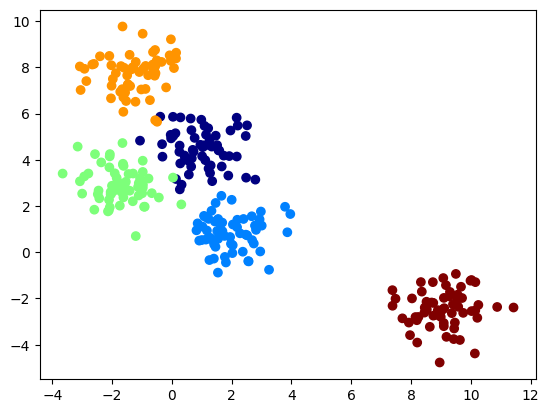

In [5]:
plt.scatter(X[:,0], X[:,1], c=Y)
#plt.savefig('images/short_simulation_generate_data.png')
plt.show()

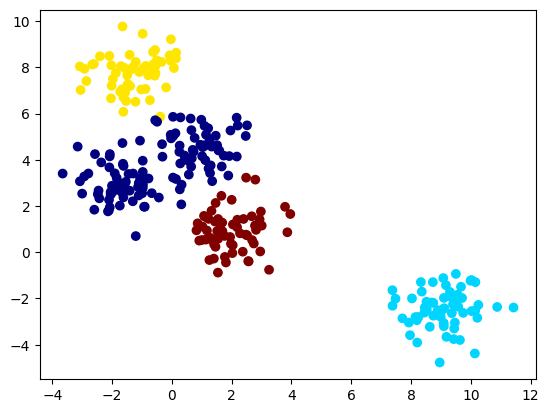

In [7]:
##**** Apply K-means clustering with k=4 then k=5 ***##
from sklearn.cluster import KMeans
kmeans = KMeans(4, random_state=0) 
Y_hat = kmeans.fit(X).labels_
color = Y_hat
plt.scatter(X[:,0], X[:,1], c=color)
plt.show()

[[-0.43064162  3.71516389]
 [ 9.07210298 -2.46057259]
 [-1.2506233   7.76363258]
 [ 2.00791599  0.9017771 ]]


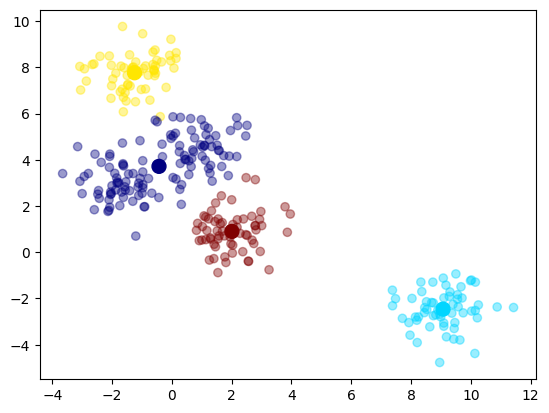

In [8]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
color_mu = color[:mu.shape[0]] 
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
#plt.savefig('images/short_simulation_kmeans.png')
print(mu)

## K-Medoids
On répète ici l'opération avec l'algorithme K-Medoids

In [22]:
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids



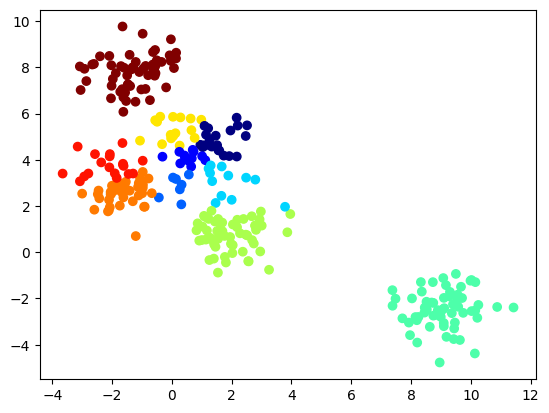

In [23]:
kmedoids = KMedoids(10, random_state=0) 
Y_hat = kmedoids.fit(X).labels_
plt.scatter(X[:,0], X[:,1], c=Y_hat)
plt.show()

[[ 1.69084152  0.91164699]
 [-0.97367301  3.47368158]
 [-1.08881562  7.79497718]
 [ 9.06393885 -2.47696545]]


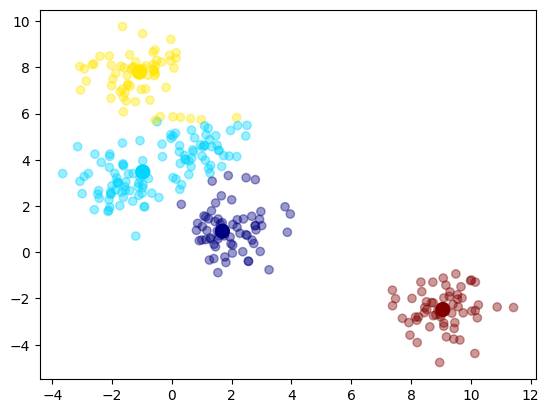

In [47]:
##**** On the figure above, plot the centroids of the resulting clusters ***##
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmedoids.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
#plt.savefig('images/short_simulation_kmedoids.png')
print(mu)

# Gaussien mixture model

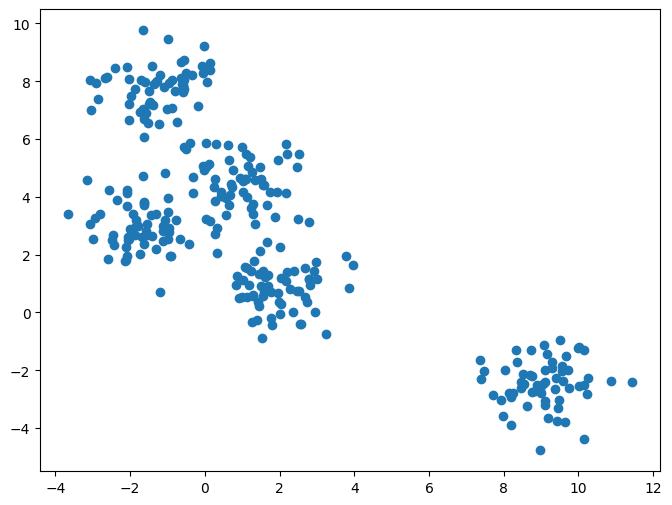

In [48]:
from sklearn.mixture import GaussianMixture

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1])
plt.show() 

[[ 9.07210298 -2.46057259]
 [-0.39869123  3.7253324 ]
 [-1.26105585  7.7901757 ]
 [ 1.98911181  0.86021347]]


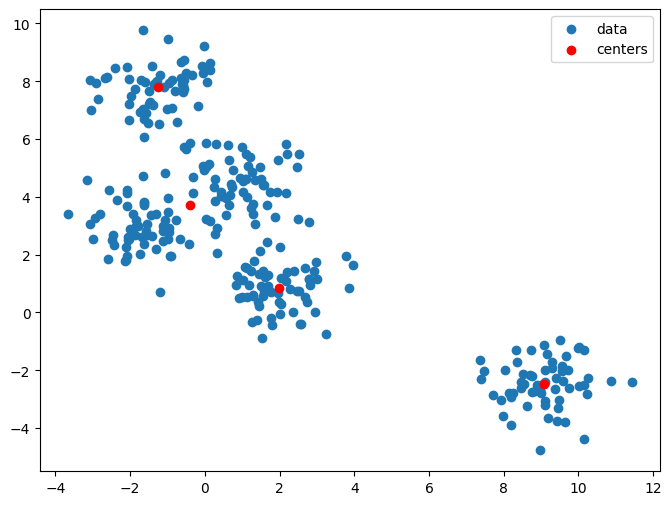

In [58]:
gm = GaussianMixture(n_components=4).fit(X)
centers = gm.means_
print(centers)
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
#plt.savefig('images/short_simulation_gmm.png')
plt.show()

## DBSCAN

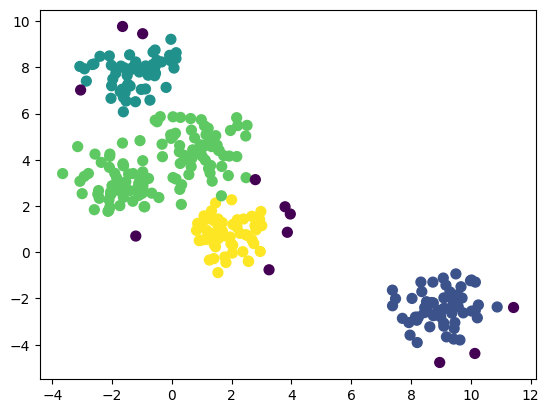

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.2)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
#plt.savefig('images/short_simulation_dbscan.png')


# K-means Clustering on MNIST digit data

## 1. Visualise MNIST digit data

In [4]:
# Load 28*28 MNIST Images
from sklearn.datasets import fetch_openml
X_digits, Y_digits = fetch_openml('mnist_784', version=1, return_X_y=True)

##**** Take only 10000 instances to shorten runtime of KMeans ***##
X_digits = X_digits[0:10000]       
Y_digits = Y_digits[0:10000]
n_samples, n_features = X_digits.shape
n_digits = len(np.unique(Y_digits))


##**** Print the number of classes, number of features, number of samples ***##
print (n_digits)
print ("n_features: %d" % n_features)
print ("n_samples: %d" % n_samples)


10
n_features: 784
n_samples: 10000


In [5]:
##**** Visualize the values of Y-digits
print(Y_digits)
##**** Thus, explain to what refer X_digits and Y_digits ***##

##**** Print the number of samples per class ***##
X_digits=np.array(X_digits)
Y_digits=np.array(Y_digits)
Y_int=Y_digits.astype(int)
print("n_samples per group: %s" % np.bincount(Y_int))

0       5
1       0
2       4
3       1
4       9
       ..
9995    5
9996    8
9997    6
9998    9
9999    7
Name: class, Length: 10000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
n_samples per group: [1001 1127  991 1032  980  863 1014 1070  944  978]


Class: 3


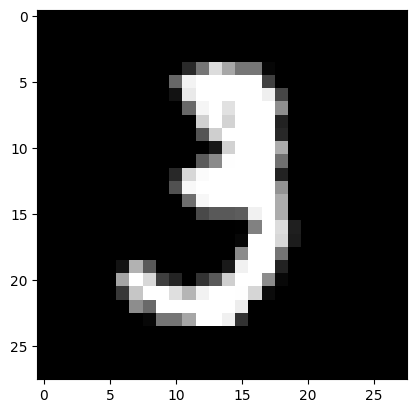

In [66]:
##**** Show an exemple of MNIST data ***##
p=10
plt.imshow(X_digits[p].reshape((28,28)), cmap='gray')
print("Class: %s" % Y_digits[p])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4' '3' '5' '3' '6' '1' '7' '2' '8'
 '6' '9']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


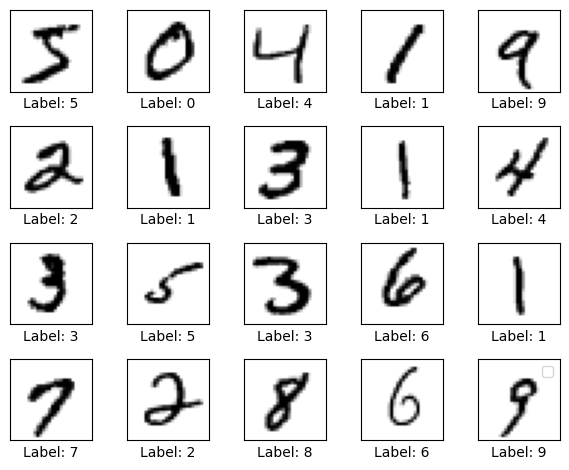

In [7]:
##**** Display twenty images, simultaneously, in grey-scale level and their associated label ***##

plt.rc("image", cmap="binary") 
print(Y_digits[:20])
for i in range(20):
    plt.subplot(4,5,i+1)    
    plt.imshow(X_digits[i].reshape(28,28))
    plt.tight_layout()
    plt.xticks(())
    plt.yticks(())
    plt.xlabel('Label: {}'.format(Y_digits[i]))
plt.legend()
plt.tight_layout()
#plt.savefig('mnist_plot.png')

## 2. Apply K-Means

******** KMEANS completed ********
(10, 784)


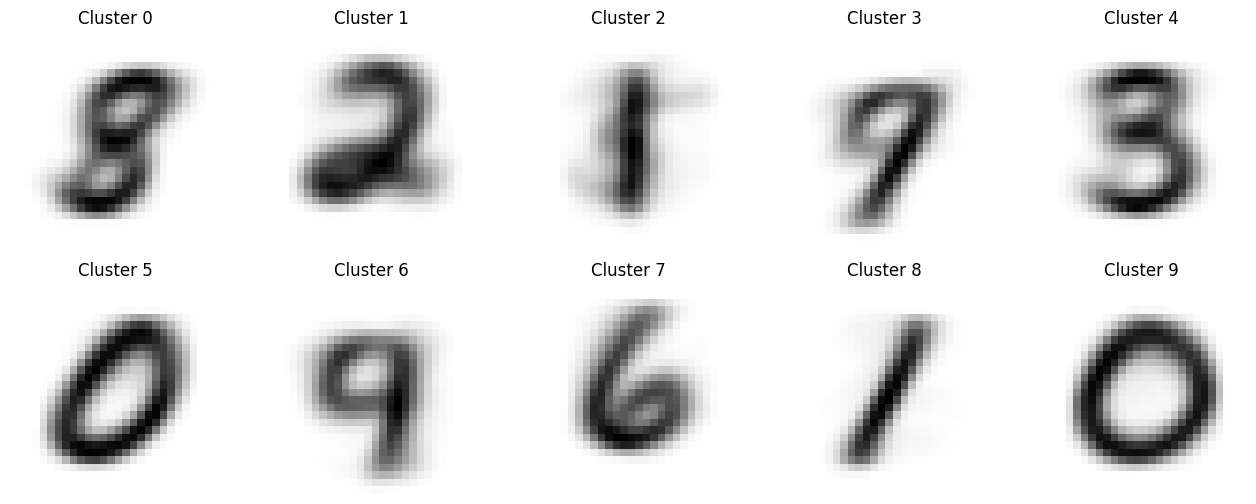

In [12]:
##**** Apply K-means with K=5 ***##
from sklearn.cluster import KMeans
n_clusters=10
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_
print(centroid_digits.shape)

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
# Visualize it on two lines with 5 images on each line
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,5,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28), cmap='binary')
    plt.title('Cluster %d' % i)
    plt.axis('off')
#plt.savefig('images/mnist_kmeans_ten_clusters.png', bbox_inches='tight', pad_inches=0.1)
plt.show()
##**** Analyze finely the obtained centroids ***##

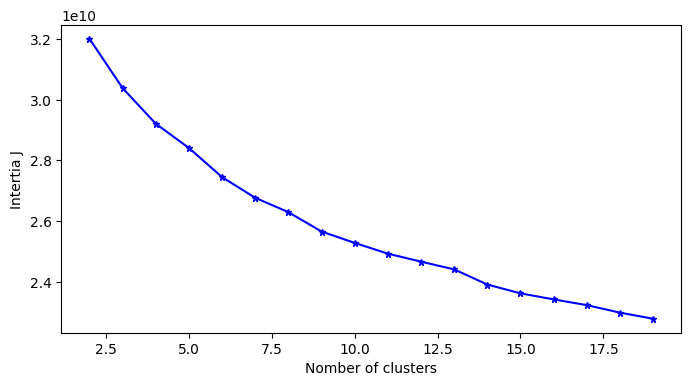

In [13]:
##**** Plot the Cost Function(Inertia) of the model as a function of K (range : 2 to 13) ***##
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,20)
    for k in K_range:
        model=KMeans(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    #plt.savefig('images/mnist_kmeans_inertia.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_inertia(X_digits)   
##**** What do you observe ? ***##

## 3. Find the best number K of clusters

For k = 2 , Average Silhouette Score : 0.0899
For k = 3 , Average Silhouette Score : 0.0586
For k = 4 , Average Silhouette Score : 0.0642
For k = 5 , Average Silhouette Score : 0.0582
For k = 6 , Average Silhouette Score : 0.0695
For k = 7 , Average Silhouette Score : 0.0535
For k = 8 , Average Silhouette Score : 0.0782
For k = 9 , Average Silhouette Score : 0.0779
For k = 10 , Average Silhouette Score : 0.075
For k = 11 , Average Silhouette Score : 0.0643
For k = 12 , Average Silhouette Score : 0.0638


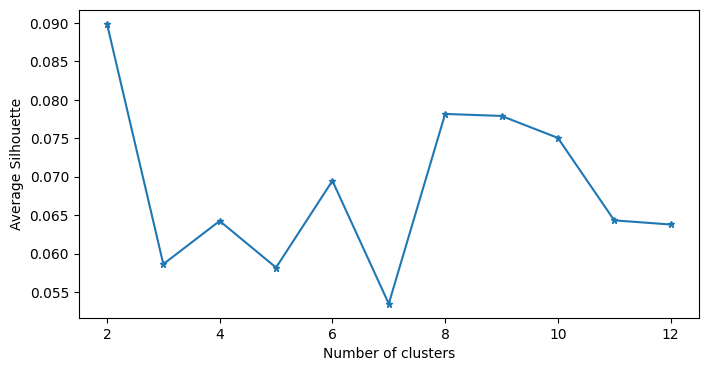

In [14]:
##**** Study K (range : 2 to 13) using the clustering metric: Silhouette ***##

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_kmeans(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMeans(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    #plt.savefig('images/mnist_kmeans_silhouette.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_silhouette_kmeans(X_digits)

##**** Analyze the obtained curve and what do you conclude on the best value of K ***##

## 4. Evaluate the quality of the clustering based on the original labels using different tools

In [33]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
n_clusters=7
kmeans = KMeans(n_clusters=n_clusters, init="k-means++")
model=kmeans.fit(X_digits)

print("******** KMEANS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

conf_matrix=sklearn.metrics.confusion_matrix(Y_int, clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

******** KMEANS completed ********
[[ 78   7  55   7  15   0 839   0   0   0]
 [  3   4   0 534   1 585   0   0   0   0]
 [ 93  11 646 105  17 110   9   0   0   0]
 [803  28  19 123  31  20   8   0   0   0]
 [  0 346  28  66 508  32   0   0   0   0]
 [368  78  24 302  65  12  14   0   0   0]
 [ 17   1 819 134  12  15  16   0   0   0]
 [  0 614   0  93 314  48   1   0   0   0]
 [468 131  42  99  29 170   5   0   0   0]
 [ 17 440   4  66 435  11   5   0   0   0]]


In [34]:
## Study of the confusion matrix
### By column
conf_matrix = conf_matrix[:, :-3]
print(conf_matrix)
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=0)
print(np.round(conf_matrix_normalized, decimals=2))
print(np.var(conf_matrix_normalized, axis=0))


[[ 78   7  55   7  15   0 839]
 [  3   4   0 534   1 585   0]
 [ 93  11 646 105  17 110   9]
 [803  28  19 123  31  20   8]
 [  0 346  28  66 508  32   0]
 [368  78  24 302  65  12  14]
 [ 17   1 819 134  12  15  16]
 [  0 614   0  93 314  48   1]
 [468 131  42  99  29 170   5]
 [ 17 440   4  66 435  11   5]]
[[0.04 0.   0.03 0.   0.01 0.   0.94]
 [0.   0.   0.   0.35 0.   0.58 0.  ]
 [0.05 0.01 0.39 0.07 0.01 0.11 0.01]
 [0.43 0.02 0.01 0.08 0.02 0.02 0.01]
 [0.   0.21 0.02 0.04 0.36 0.03 0.  ]
 [0.2  0.05 0.01 0.2  0.05 0.01 0.02]
 [0.01 0.   0.5  0.09 0.01 0.01 0.02]
 [0.   0.37 0.   0.06 0.22 0.05 0.  ]
 [0.25 0.08 0.03 0.06 0.02 0.17 0.01]
 [0.01 0.27 0.   0.04 0.3  0.01 0.01]]
[0.0197407  0.01593003 0.03084692 0.00914933 0.01713564 0.02851288
 0.07756663]


In [35]:
conf_matrix = conf_matrix.T
print(conf_matrix)
conf_matrix_normalized = conf_matrix / conf_matrix.sum(axis=0)
print(np.round(conf_matrix_normalized, decimals=2))
print(np.var(conf_matrix_normalized, axis=0))

[[ 78   3  93 803   0 368  17   0 468  17]
 [  7   4  11  28 346  78   1 614 131 440]
 [ 55   0 646  19  28  24 819   0  42   4]
 [  7 534 105 123  66 302 134  93  99  66]
 [ 15   1  17  31 508  65  12 314  29 435]
 [  0 585 110  20  32  12  15  48 170  11]
 [839   0   9   8   0  14  16   1   5   5]]
[[0.08 0.   0.09 0.78 0.   0.43 0.02 0.   0.5  0.02]
 [0.01 0.   0.01 0.03 0.35 0.09 0.   0.57 0.14 0.45]
 [0.05 0.   0.65 0.02 0.03 0.03 0.81 0.   0.04 0.  ]
 [0.01 0.47 0.11 0.12 0.07 0.35 0.13 0.09 0.1  0.07]
 [0.01 0.   0.02 0.03 0.52 0.08 0.01 0.29 0.03 0.44]
 [0.   0.52 0.11 0.02 0.03 0.01 0.01 0.04 0.18 0.01]
 [0.84 0.   0.01 0.01 0.   0.02 0.02 0.   0.01 0.01]]
[0.0812959  0.05015913 0.04498956 0.06845744 0.03670256 0.02521538
 0.07540903 0.04030157 0.02408016 0.03748721]


In [ ]:
##**** Tool 2 : Infer a label to each resulting cluster based on the most represented label in the cluster ***##

def infer_cluster_labels(kmeans, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels = {}
    for i in range(kmeans.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # append the new number to the existing array at this slot
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels[np.argmax(counts)] = [i]
        
    return inferred_labels  

def infer_data_labels(X_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels

cluster_labels = infer_cluster_labels(model, Y_int)
ig, axs = plt.subplots(1,n_clusters,figsize=(20,20))
plt.gray()
for i,ax in enumerate(axs.flat):    
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('inferred label : {}'.format(key))          
    ax.imshow(centroid_digits[i].reshape(28,28))
    ax.axis('off')
plt.show()

##**** Analyze the inferred labels with the best value of K. Conclude ***##

In [ ]:
##**** Tool 3 : Use Entropy metric ***##
import scipy
entropie = np.zeros(n_clusters)
for i in range(n_clusters):
    ind = X_digits[clusters==i]
    entropie[i] = scipy.stats.entropy(clusters==i)

print("Entropies=", entropie)
print("Average Entropy =", round(entropie.mean(),3))

In [ ]:
indmin = np.argmin(entropie)

print("Cluster ", indmin," presents the lowest entropy value =",entropie[indmin])
imc = X_digits[clusters==indmin]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

In [ ]:
indmax = np.argmax(entropie)

print("Cluster ", indmax," presents the highest entropy value =",entropie[indmax])
imc = X_digits[clusters==indmax]
plt.figure(figsize=(7.195, 3.841), dpi=300)
for i in range(200):
 plt.subplot(10,20,i+1)
 plt.imshow(imc[i,:].reshape([28,28]), cmap='binary')
 plt.axis('off')

In [ ]:
# Test different number of clusters
clu=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for n_clust in clu:
    estimator = KMeans(n_clusters = n_clust, init="k-means++",n_init=4)
    estimator.fit(X_digits)
     
    # Determine the inferred label of each cluster
    cluster_labels = infer_cluster_labels(estimator, Y_int)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Compute and display the percentage of total good classification 
    acc=metrics.accuracy_score(Y_int, predicted_Y)
    acc=acc*100
    print("For k =", n_clust, ', Good distribution of : {}%\n'.format(round(acc,2)))

# K-medoïd Clustering on MNIST Digit

Note: you may need to restart the kernel to use updated packages.
******** KMEDOIDS completed ********
(10, 784)


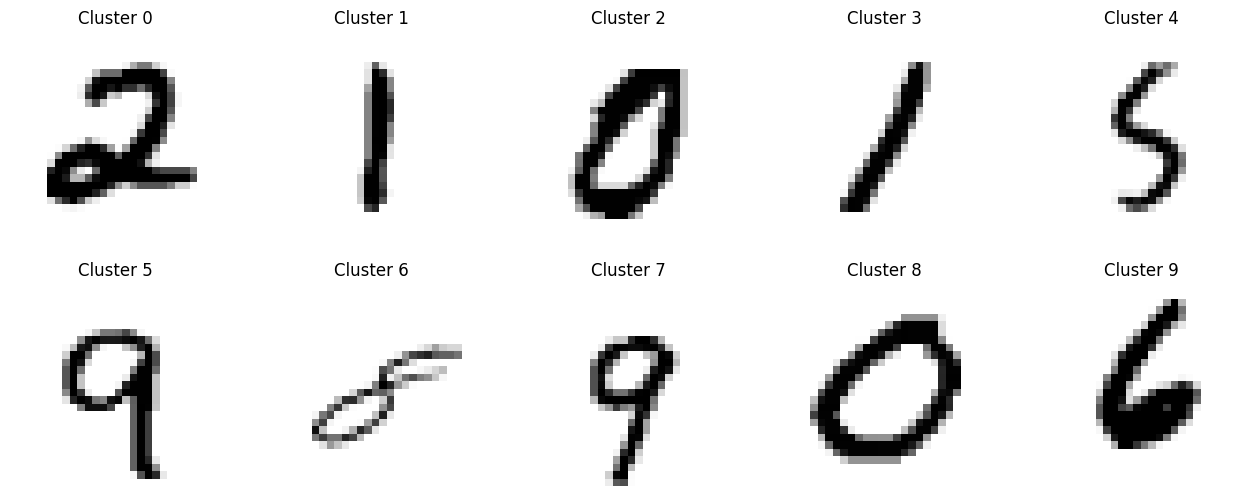

In [8]:
%pip install -U scikit-learn-extra

from sklearn_extra.cluster import KMedoids

##**** Apply K-medoids with K=5 ***##
n_clusters=10
kmedoids = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model=kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_
print(centroid_digits.shape)

# Unsupervised classification of data
clusters=model.predict(X_digits) 

##**** Visualize the centroids ***##
# Visualize it on two lines with 5 images on each line
plt.figure(figsize=(16,6))
for i in range(n_clusters): 
    plt.subplot(2,5,i+1)
    plt.imshow(centroid_digits[i].reshape(28,28), cmap='binary')
    plt.title('Cluster %d' % i)
    plt.axis('off')
    plt.savefig('images/mnist_kmedoids_ten_clusters.png', bbox_inches='tight', pad_inches=0.1)
plt.show()  

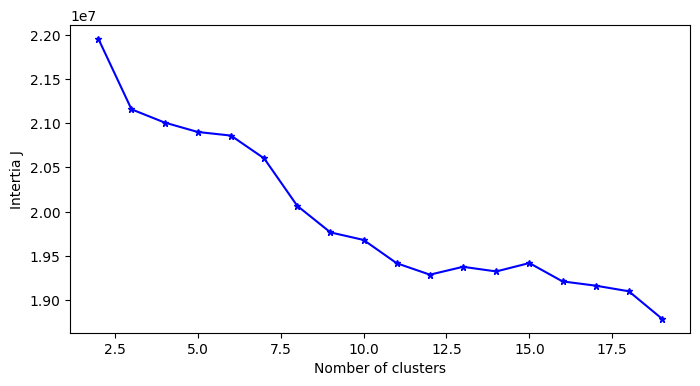

In [9]:
def plot_inertia(X_digits):
    inertia=[]  
    K_range=range(2,20)
    for k in K_range:
        model=KMedoids(n_clusters = k).fit(X_digits)
        inertia.append(model.inertia_) 

    plt.figure(figsize=((8,4)))
    plt.plot(K_range,inertia, marker='*', color='blue', markersize=5)
    plt.xlabel('Nomber of clusters')
    plt.ylabel('Intertia J')
    plt.savefig('images/mnist_kmedoids_inertia.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_inertia(X_digits) 

For k = 2 , Average Silhouette Score : 0.026
For k = 3 , Average Silhouette Score : 0.0318
For k = 4 , Average Silhouette Score : 0.0284
For k = 5 , Average Silhouette Score : 0.0275
For k = 6 , Average Silhouette Score : 0.0192
For k = 7 , Average Silhouette Score : 0.0276
For k = 8 , Average Silhouette Score : 0.0323
For k = 9 , Average Silhouette Score : 0.0256
For k = 10 , Average Silhouette Score : 0.0261
For k = 11 , Average Silhouette Score : 0.0331
For k = 12 , Average Silhouette Score : 0.0298


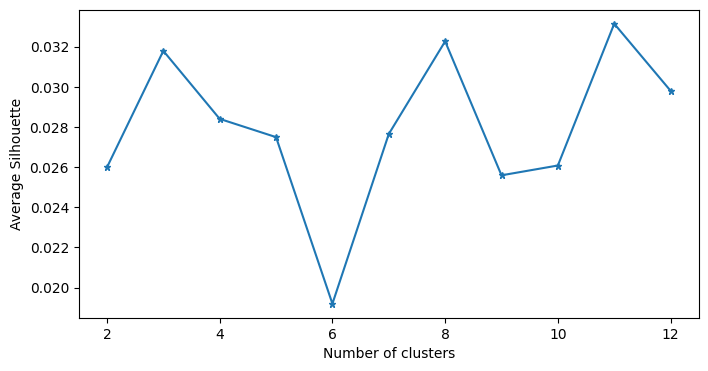

In [10]:
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_kmedoids(X_digits):
    silhouette=[]
    K_range = range(2,13)
    for k in K_range:
        clusterer = KMedoids(n_clusters = k)
        cluster_labels = clusterer.fit_predict(X_digits)
        silhouette_avg = silhouette_score(X_digits, cluster_labels)
        print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
        silhouette.append(silhouette_avg)
    
    plt.figure(figsize=((8,4)))
    plt.plot(K_range,silhouette, marker='*', markersize=5)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average Silhouette')
    plt.savefig('images/mnist_kmedoids_silhouette.png', bbox_inches='tight', pad_inches=0.1)
    plt.show()

plot_silhouette_kmedoids(X_digits)

In [18]:

from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score


silhouette1=[]
K_range = range(2,13)
for k in K_range:
    clusterer = KMedoids(n_clusters = k)
    cluster_labels = clusterer.fit_predict(X_digits)
    silhouette_avg = silhouette_score(X_digits, cluster_labels)
    print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
    silhouette1.append(silhouette_avg)



silhouette=[]
K_range = range(2,13)
for k in K_range:
    clusterer = KMeans(n_clusters = k)
    cluster_labels = clusterer.fit_predict(X_digits)
    silhouette_avg = silhouette_score(X_digits, cluster_labels)
    print("For k =", k, ", Average Silhouette Score :", round(silhouette_avg,4))
    silhouette.append(silhouette_avg)

plt.figure(figsize=((8,4)))
plt.plot(K_range,silhouette1, marker='*', markersize=5, label = 'KMedoids method')
plt.plot(K_range,silhouette, marker='*', markersize=5, label = 'KMeans method')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette')
plt.savefig('images/mnist_comparison_silhouette.png', bbox_inches='tight', pad_inches=0.1)
plt.legend()
plt.show()



For k = 2 , Average Silhouette Score : 0.026
For k = 3 , Average Silhouette Score : 0.0318
For k = 4 , Average Silhouette Score : 0.0284
For k = 5 , Average Silhouette Score : 0.0275
For k = 6 , Average Silhouette Score : 0.0192
For k = 7 , Average Silhouette Score : 0.0276
For k = 8 , Average Silhouette Score : 0.0323


KeyboardInterrupt: 

In [11]:
##**** Tool 1 : Use confusion matrix reporting the distribution of the images of a given class (lines) in each cluster (column) ***##
n_clusters=10
kmeans = KMedoids(n_clusters=n_clusters, init="k-medoids++")
model=kmedoids.fit(X_digits)

print("******** KMEDOIDS completed ********")

centroid_digits = model.cluster_centers_

# Unsupervised classification of data
clusters=model.predict(X_digits) 

conf_matrix=sklearn.metrics.confusion_matrix(Y_int, clusters)
print(conf_matrix)

##**** Analyze the results and accordingly conclude on the quality of the clustering  ***##
##**** Perfom a clustering with the best value of K. Analyze the quality of the clustering ***##

******** KMEDOIDS completed ********
[[368  38   6   6  13  43   3   5   9 510]
 [  0   0 533 587   4   0   2   1   0   0]
 [  3  11 388 143  11 126  59  27 108 115]
 [  5  50  65 193  20  24  48 605   1  21]
 [  6  85 149  44 309  27 334   2  20   4]
 [ 18 138  71 126  53 117 110 177   9  44]
 [ 32 197  31  47   4 182   2   0 506  13]
 [  2   5 103  68 477   1 403   1   0  10]
 [  5  99 215 141  16  13 176 249  15  15]
 [ 14  44  48  38 408   3 400   8   4  11]]


# Gaussian Mixture Model for Clustering 


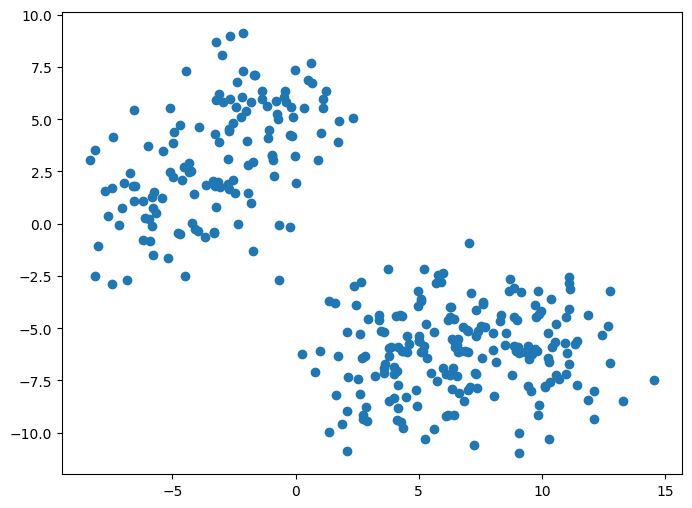

In [16]:
from sklearn.mixture import GaussianMixture
x, _ = datasets.make_blobs(n_samples=330, centers=5, cluster_std=1.84)

plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1])
plt.show() 

In [17]:
gm = GaussianMixture(n_components=5).fit(x)
#gm.get_params() 

In [18]:
centers = gm.means_
print(centers)
  

[[-6.24732696  0.84098557]
 [ 9.75366779 -5.89815993]
 [ 4.79904092 -6.28126988]
 [-1.1361473   5.53607491]
 [-3.19452058  1.66067614]]


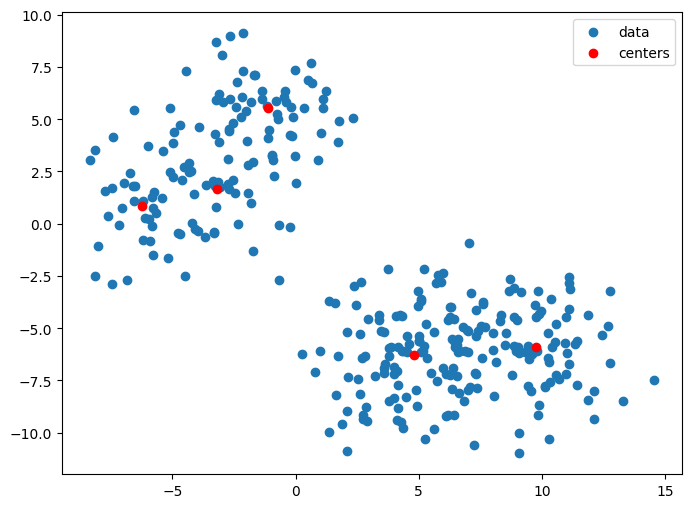

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(x[:,0], x[:,1], label="data")
plt.scatter(centers[:,0], centers[:,1],c='r', label="centers")
plt.legend()
plt.show() 

In [ ]:
from pandas import DataFrame 
pred = gm.predict(x)

df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
groups = df.groupby('label')

ig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group.x, group.y, label=name)

ax.legend()
plt.show() 

In [ ]:
f = plt.figure(figsize=(8, 6), dpi=80)
f.add_subplot(2, 2, 1)

for i in range(2, 6):
 gm = GaussianMixture(n_components=i).fit(x)
 pred = gm.predict(x)
 df = DataFrame({'x':x[:,0], 'y':x[:,1], 'label':pred})
 groups = df.groupby('label')
 f.add_subplot(2, 2, i-1)
 for name, group in groups:
    plt.scatter(group.x, group.y, label=name, s=8)
    plt.title("Cluster size:" + str(i))
    plt.legend()

plt.tight_layout()        
plt.show()  

# Limitation of K-Means

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='plasma')


In [ ]:
# To complete by the application of K-means and DBSCAN methods on such data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='plasma')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.3)
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')




# K-Means for Compression / Segmentation

In [ ]:
from skimage import io

In [ ]:
##**** Read the image 1 ***##
OrigImage = io.imread('dog.jpg')
io.imshow(OrigImage)
print('Shape of the Image : ', OrigImage.shape)


In [ ]:
##**** Reshape the image : convert the image into a vector BUT here each element of the vector is in 3D (RGB) ***##
rows, cols = OrigImage.shape[0], OrigImage.shape[1]
image = OrigImage.reshape(rows * cols, 3)
print(image.shape)
print(image[:4])

In [ ]:
##**** Apply K-Means on the image with K=5, K=10 and K=16 ***##
kMeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
model=kMeans.fit(image)

##**** Observe examples of Centeroids in RGB domain (3D) ***##
centers = np.asarray(model.cluster_centers_, dtype = np.uint8)
#centers

In [ ]:
# labels 
labels = np.asarray(model.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
#labels

In [ ]:
##**** Reconstruction of the image based on the segmentation obtained with K-means ***##
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # Assignment of every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]
#io.imsave('dog-compressed.png', newImage);
io.imshow(newImage);
newImage.shape

In [ ]:
##**** Display the original and the compressed images side-by-side for a better comparion ***##
##**** Compare with different values of k clusters ***##

fig, ax = plt.subplots(1, 2, figsize=(20, 10),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(OrigImage)
ax[0].set_title('Original Image', size=10)
ax[1].imshow(newImage)
ax[1].set_title('Compressed Image', size=10);